In [1]:
from utils import *
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.morphology import skeletonize

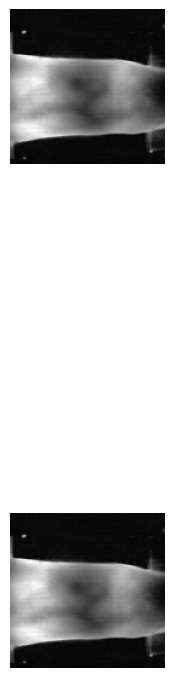

In [6]:
input_imgs = [
    '../data/good_result/finger_3600.png',
    '../data/good_result/finger_3600.png',
]


imgs = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in input_imgs]

fig, ax = plt.subplots(len(imgs), 1, figsize=(2, 12))
    
for i, img in enumerate(imgs):
    ax[i].imshow(img, cmap='gray')
    ax[i].axis('off')

In [7]:
def rotate_image_90(img):
    return np.rot90(img, 2)

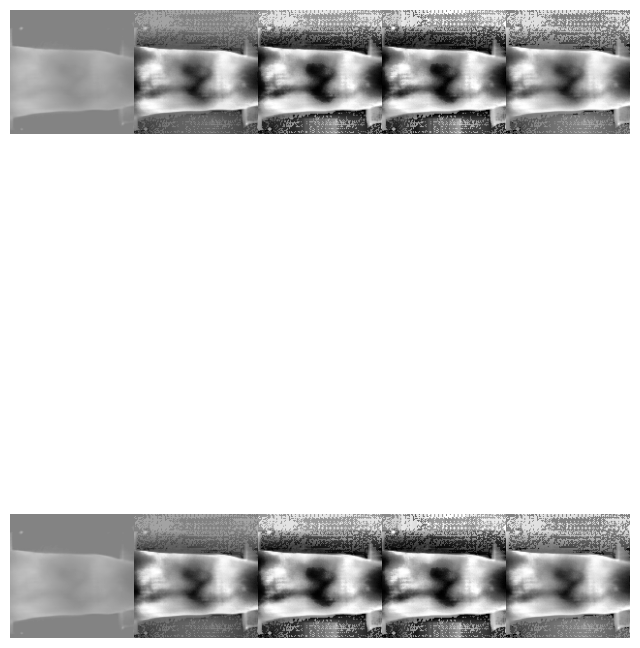

In [8]:
clip_limit = 32
grid_size = (4, 4)

imgs_eq = [clahe(img, clip_limit, grid_size) for img in imgs]
imgs_eq2 = [clahe(img, clip_limit, grid_size) for img in imgs_eq]
imgs_eq3 = [clahe(img, clip_limit, grid_size) for img in imgs_eq2]
imgs_eq13 = [clahe(img, clip_limit*3, grid_size) for img in imgs]

fig, ax = plt.subplots(len(imgs), 1, figsize=(8, 12))
    
for i, img in enumerate(imgs):
    img_show = cv2.hconcat([img, imgs_eq[i], imgs_eq2[i], imgs_eq3[i], imgs_eq13[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

imgs_eq = imgs_eq3

In [9]:
def display_filter(filter):

    fig, ax = plt.subplots(1, 1, figsize=(2, 2))
    
    ax.imshow(filter, cmap='gray', interpolation='none')
    ax.axis('off')
    

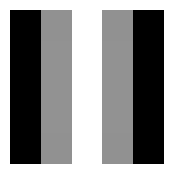

In [10]:
# Define your custom parameters
ksize = 5
theta = np.pi  # Vertical orientation
sigma = 3.0
lambd = 5
gamma = 0.1
psi = 0

filter = gabor_filter(ksize, sigma, theta, lambd, gamma, psi)

display_filter(filter)

In [11]:
# inverted_img = invert(img_eq)
# inverted_img = img_eq
# filtered_img = apply_filter(inverted_img, filter)
# filtered2_img = remove_lines(inverted_img, filtered_img, 250)
# 
# img_show = cv2.hconcat([img_eq, inverted_img, filtered_img, filtered2_img])
# fig, ax = plt.subplots(1, 1, figsize=(8, 2))
# ax.imshow(img_show, cmap='gray', interpolation='none')
# ax.axis('off')

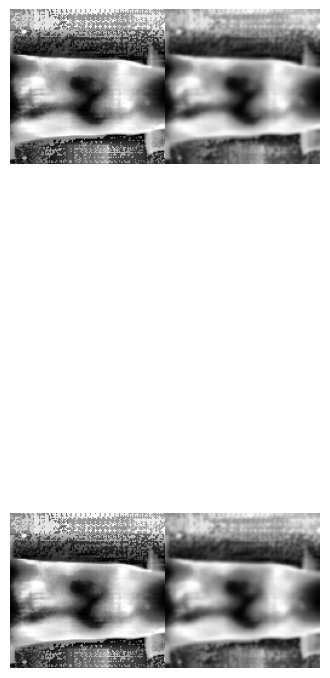

In [12]:
gaussian_blur_imgs = [gaussian_blur(img, 5, 1) for img in imgs_eq]

fig, ax = plt.subplots(len(imgs), 1, figsize=(4, 12))

for i, img in enumerate(imgs_eq):
    img_show = cv2.hconcat([img, gaussian_blur_imgs[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

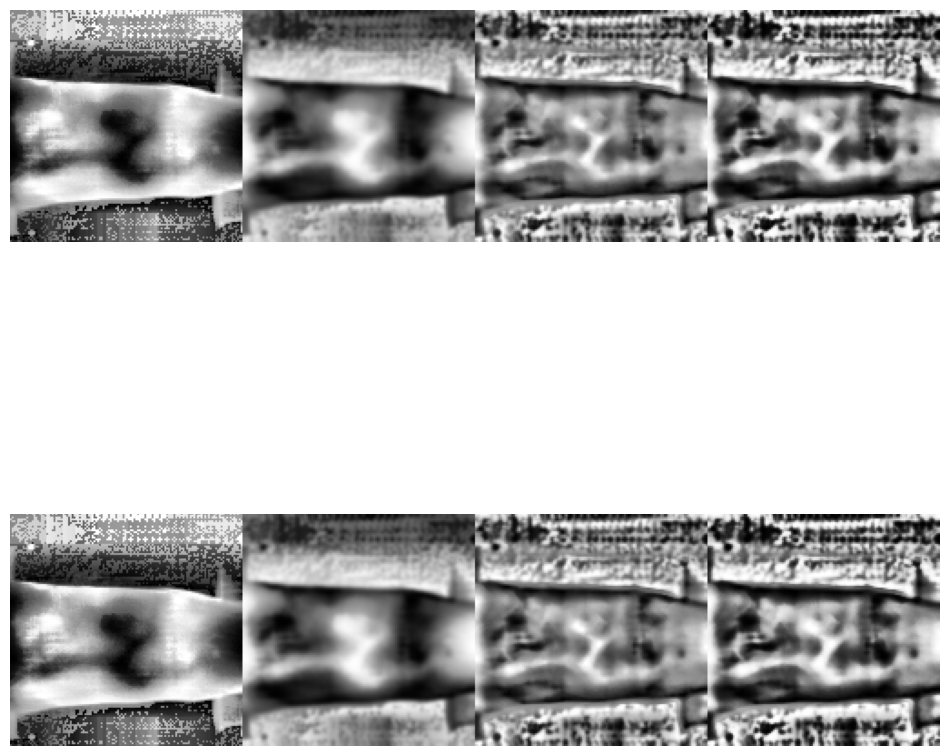

In [13]:
clip_limit_2 = 10
grid_size_2 = (12, 12)

inverted_gaussian_imgs = [invert(img) for img in gaussian_blur_imgs]
inverted_gaussian_imgs_cl = [clahe(img, clip_limit_2, grid_size_2) for img in inverted_gaussian_imgs]
inverted_gaussian_imgs_eq = [histogram_equalization(img) for img in inverted_gaussian_imgs_cl]

fig, ax = plt.subplots(len(imgs), 1, figsize=(12, 12))

for i, img in enumerate(imgs_eq):
    img_show = cv2.hconcat([img, inverted_gaussian_imgs[i], inverted_gaussian_imgs_cl[i], inverted_gaussian_imgs_eq[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')


In [14]:
def adaptive_threshold(img):
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 63, 5)
    return img

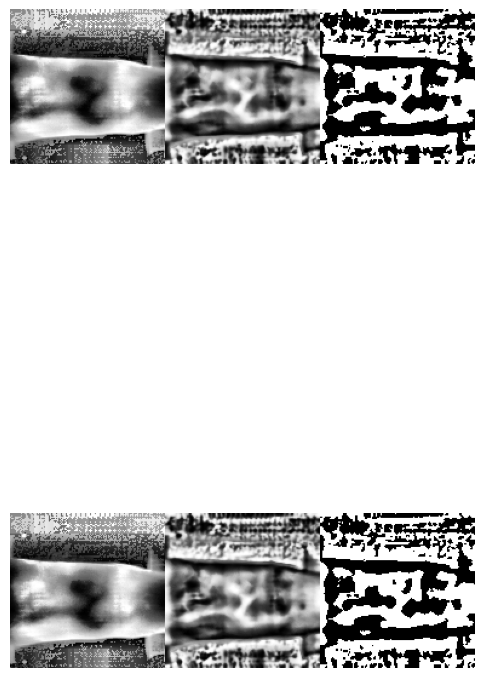

In [15]:
threshold = 110

imgs_thresh = [adaptive_threshold(img,) for img in inverted_gaussian_imgs_eq]

fig, ax = plt.subplots(len(imgs), 1, figsize=(6, 12))

for i, img in enumerate(imgs_eq):
    img_show = cv2.hconcat([img, inverted_gaussian_imgs_eq[i], imgs_thresh[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

In [16]:
def isolate_finger(thresh_image):
    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Identify the contour corresponding to the central section
    central_contour = max(contours, key=cv2.contourArea)

    # Create a mask for the central section
    mask = np.zeros_like(thresh_image)
    cv2.drawContours(mask, [central_contour], -1, 255, thickness=cv2.FILLED)


    # Keep only the central section using the mask
    result_image = cv2.bitwise_and(thresh_image, mask)

    return result_image

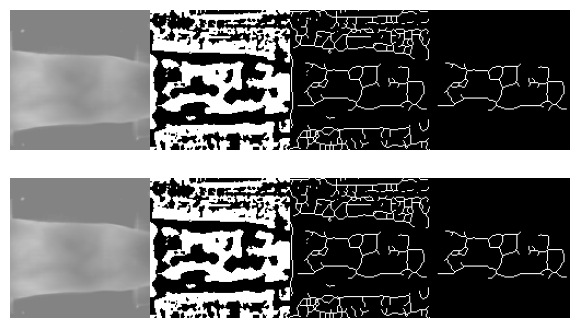

In [18]:

skeletons = [skeletonize(img).astype(np.uint8)*255 for img in imgs_thresh]   
isolate_finger_imgs = [isolate_finger(img) for img in skeletons]

fig, ax = plt.subplots(len(imgs), 1, figsize=(8, 4))

for i, img in enumerate(imgs):
    img_show = cv2.hconcat([img, imgs_thresh[i], skeletons[i], isolate_finger_imgs[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')

In [ ]:
fig, ax = plt.subplots(len(imgs), 1, figsize=(20, 4))
for i, img in enumerate(imgs):
    img_show = cv2.hconcat([img, imgs_eq[i], inverted_gaussian_imgs_eq[i] , imgs_thresh[i], isolate_finger_imgs[i]])
    ax[i].imshow(img_show, cmap='gray')
    ax[i].axis('off')